# **Extract image feature using EffecientNet B0 with ImageNet weight**

In [ ]:
import os
import glob
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#Define path mount to driver data
Train_data_path = '/content/drive/MyDrive/DATASET/output/train'
Test_data_path = '/content/drive/MyDrive/DATASET/output/test'
Val_data_path = '/content/drive/MyDrive/DATASET/output/val'

In [ ]:
# LABELS = []
# for _, dirs, _ in os.walk(Train_data_path):
#   for dir in dirs:
#     LABELS.append(dir)
# LABELS

['Banh chung',
 'Banh mi',
 'Banh tet',
 'Banh trang',
 'Banh xeo',
 'Bun',
 'Com tam',
 'Goi cuon',
 'Pho',
 'Bun dau mam tom',
 'Nem chua',
 'Chao long']

In [ ]:
LABELS = ['Banh chung','Banh mi', 'Banh tet', 'Banh trang', 'Banh xeo', 'Bun', 'Com tam', 'Goi cuon', 'Pho']

**Data argmentation**

In [ ]:
# Khởi tạo một ImageDataGenerator với các phép biến đổi (augmentation) mong muốn
datagen = ImageDataGenerator(
    rotation_range=40,       # Góc quay ảnh (đơn vị: độ)
    width_shift_range=0.2,   # Phạm vi dịch chuyển theo chiều rộng
    height_shift_range=0.2,  # Phạm vi dịch chuyển theo chiều cao
    shear_range=0.2,         # Độ biến dạng
    zoom_range=0.2,          # Phạm vi thu phóng
    horizontal_flip=True,    # Lật ảnh theo chiều ngang
    fill_mode='nearest'      # Chế độ điền pixel khi biến đổi
)

In [ ]:
img_path = '/content/drive/MyDrive/DATASET/output/train/Banh xeo/1.jpg'  # Thay đổi đường dẫn đến ảnh của bạn
img = image.load_img(img_path, target_size=(224, 224))  # Đọc ảnh và resize về kích thước 150x150

In [ ]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

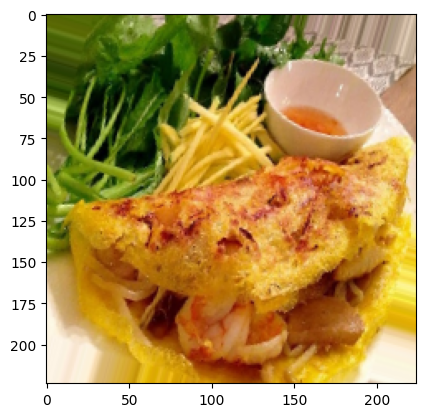

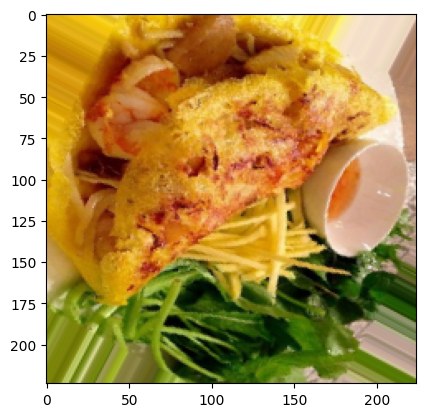

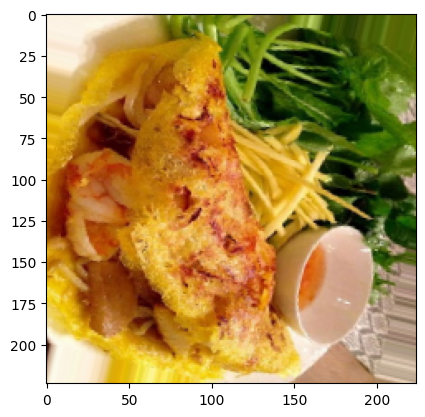

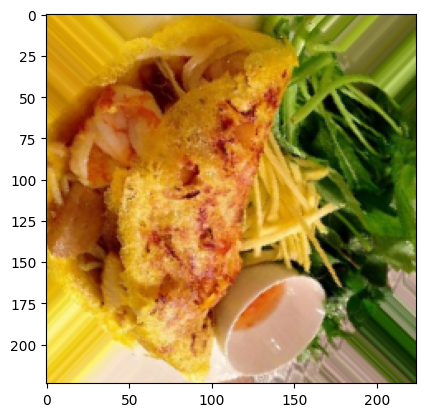

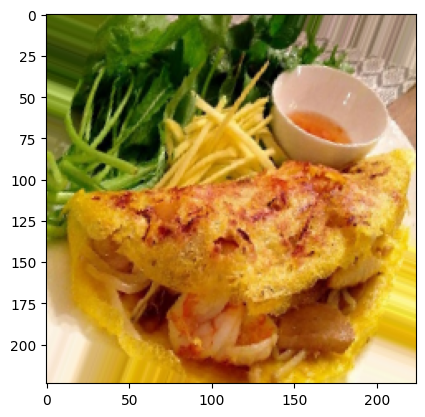

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:  # Giới hạn số lượng ảnh biến đổi hiển thị là 5
        break

plt.show()

In [ ]:
#create model
model = EfficientNetB0(include_top=False, weights="imagenet")

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Extract data
def extract (path):
  for label in LABELS:
    extract_feature= []
    base_path = os.path.join(path, label, '*')
    files = glob.glob(base_path)
    for file in files:
      img = image.load_img(file, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      extract_feature.append(model.predict(x))
    extract_feature = np.concatenate(extract_feature, axis=0)
    path_save = os.path.join(path, label, 'extract_Effecient.npy')
    np.save(path_save, extract_feature)
    print('----- saved in ', label)

In [ ]:
#train
extract(Train_data_path)

In [ ]:
#val
extract(Val_data_path)

In [ ]:
#test
extract(Test_data_path)

# Test

In [ ]:
#test
extract_feature= []
base_path = '/content/drive/MyDrive/DATASET/output/val/Banh chung'
base_path = os.path.join(base_path, '*')
files = glob.glob(base_path)
for file in files:
  img = image.load_img(file, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  extract_feature.append(model.predict(x))

In [ ]:
extract_feature = np.concatenate(extract_feature, axis=0)

In [ ]:
path_save = '/content/drive/MyDrive/DATASET/output/val/Banh chung/extracted_features.npy'
np.save(path_save, extract_feature)

In [ ]:
feature_path = '/content/drive/MyDrive/DATASET/output/train/Banh chung/extract_Effecient.npy'
feature = np.load(feature_path)

In [ ]:
feature= []